### Prediction of scraped MyAnimeList Data ###

In [667]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [668]:
import warnings
warnings.filterwarnings('ignore')

In [669]:
df = pd.read_csv("anime_df_brr.csv", sep=';')
df.head(10)

,Unnamed: 0,Title,MAL Id,Type,Episode Duration,Episode Count,Status,Studios,Source Type,Genres,Themes,Rating,Popularity,Score,Year,Demographic
0,0,Fullmetal Alchemist: Brotherhood,5114,TV,24 min. per ep.,64,Finished Airing,Bones,Manga,"Action,Adventure,Comedy,Drama,Fantasy",N\A,R - 17+ (violence & profanity),3,9.15,9,Shounen
1,1,Shingeki no Kyojin: The Final Season Part 2,48583,TV,23 min. per ep.,12,Currently Airing,MAPPA,Manga,"Action,Drama,Fantasy,Mystery","Military,Super Power",R - 17+ (violence & profanity),220,9.15,22,Shounen
2,2,Steins;Gate,9253,TV,24 min. per ep.,24,Finished Airing,White Fox,Visual,"Drama,Sci-Fi,Suspense",N\A,PG-13 - Teens 13 or older,13,9.09,11,N\A
3,3,Gintama°,28977,TV,24 min. per ep.,51,Finished Airing,Bandai Namco Pictures,Manga,"Action,Comedy,Sci-Fi","Historical,Parody,Samurai",PG-13 - Teens 13 or older,335,9.09,15,Shounen
4,4,Shingeki no Kyojin Season 3 Part 2,38524,TV,23 min. per ep.,10,Finished Airing,Wit Studio,Manga,"Action,Drama,Fantasy,Mystery","Military,Super Power",R - 17+ (violence & profanity),31,9.08,19,Shounen
5,5,Fruits Basket: The Final,42938,TV,23 min. per ep.,13,Finished Airing,TMS Entertainment,Manga,"Drama,Romance,Slice of Life,Supernatural",N\A,PG-13 - Teens 13 or older,626,9.06,21,Shoujo
6,6,Gintama',9969,TV,24 min. per ep.,51,Finished Airing,Sunrise,Manga,"Action,Comedy,Sci-Fi","Historical,Parody,Samurai",PG-13 - Teens 13 or older,380,9.06,11,Shounen
7,7,Gintama: The Final,39486,Movie,1 hr. 44 min.,1,Finished Airing,Bandai Namco Pictures,Manga,"Action,Comedy,Drama,Sci-Fi","Historical,Parody,Samurai",PG-13 - Teens 13 or older,1798,9.05,21,Shounen
8,8,Hunter x Hunter (2011),11061,TV,23 min. per ep.,148,Finished Airing,Madhouse,Manga,"Action,Adventure,Fantasy",N\A,PG-13 - Teens 13 or older,10,9.05,11,Shounen
9,9,Gintama': Enchousen,15417,TV,24 min. per ep.,13,Finished Airing,Sunrise,Manga,"Action,Comedy,Sci-Fi","Historical,Parody,Samurai",PG-13 - Teens 13 or older,683,9.04,12,Shounen


delete null information. (if exists)

In [670]:
data_null_total = pd.DataFrame(df.isna().sum()).T.rename({0:'total null'})
data_null_total

,Unnamed: 0,Title,MAL Id,Type,Episode Duration,Episode Count,Status,Studios,Source Type,Genres,Themes,Rating,Popularity,Score,Year,Demographic
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


get info.

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   Title             50 non-null     object 
 2   MAL Id            50 non-null     int64  
 3   Type              50 non-null     object 
 4   Episode Duration  50 non-null     object 
 5   Episode Count     50 non-null     int64  
 6   Status            50 non-null     object 
 7   Studios           50 non-null     object 
 8   Source Type       50 non-null     object 
 9   Genres            50 non-null     object 
 10  Themes            50 non-null     object 
 11  Rating            50 non-null     object 
 12  Popularity        50 non-null     int64  
 13  Score             50 non-null     float64
 14  Year              50 non-null     int64  
 15  Demographic       50 non-null     object 
dtypes: float64(1), int64(5), object(10)
memory usa

check for duplicated data. (if there is)

In [672]:
df = df.drop_duplicates(keep='first')

Lets remove entries with 'None' data.

'add some' is a placeholder of shows without a known studio. <br>
'Unknown'

In [673]:
no_studio = df[df['Studios'].str.contains('add some')]
df = pd.concat([df, no_studio])
df = df.drop_duplicates(keep=False)

In [674]:
no_source = df[df['Source Type'].str.contains('Unknown')]
df = pd.concat([df, no_source])
df = df.drop_duplicates(keep=False)

In [675]:
no_genre = df[df['Genres'] == 'N\A']
df = pd.concat([df, no_genre])
df = df.drop_duplicates(keep=False)

Parsing Episode Duration to 'int' minutes.

In [676]:
def DurationToMin(duration_str):
    duration_list = duration_str.split(' ')
    duration = 0

    i = 0
    for word in duration_list:
        if word == 'min.':
            duration += int(duration_list[i-1])
        elif word == 'hr.':
            duration += 60*int(duration_list[i-1])
        i += 1

    return duration

In [677]:
df['Duration'] = df['Episode Duration'].apply(lambda x: DurationToMin(x))

Lets remove shows with episode duration smaller than 1 minute.

In [678]:
no_duration = df[df['Duration'] == 0]
df = pd.concat([df, no_duration])
df = df.drop_duplicates(keep=False)

Lets separate the genres into their own columns.

In [679]:
genre_list = []
for cell in df['Genres']:
    genres = cell.split(',')
    for genre in genres:
        if genre not in genre_list:
            genre_list.append(genre)

for genre in genre_list:
    df[genre] = df.apply (lambda row: genre in row['Genres'], axis=1)

df.to_csv("anime_df_clean.csv", sep=';', index=False)

### Graphs ###

<AxesSubplot:title={'center':'Studio and the Number of Published Anime'}>

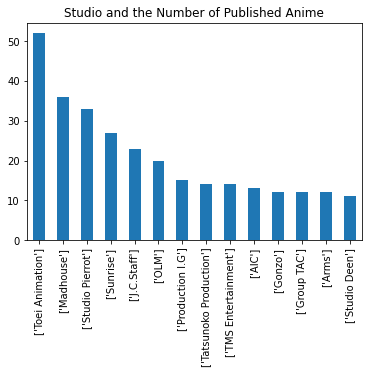

In [97]:
#MAKE MEDIAN STUDIO POPULARITY
#MAKE CHART

import matplotlib.pyplot as plt 

plt.title('Studio and the Number of Published Anime')
studio_appearances = df.Studios.value_counts()
studio_appearances[studio_appearances > 10].plot(kind = 'bar')

charts

<AxesSubplot:title={'center':'Genres and the Number of Published Anime'}>

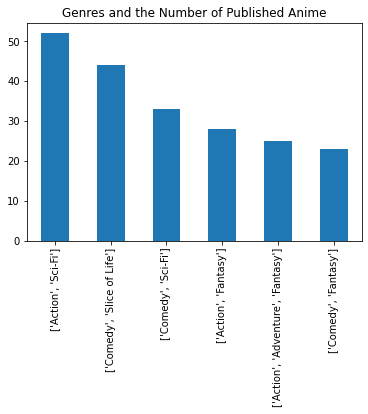

In [98]:

#cut genres
#median genre popularity
#make chart of genre vs populrity


plt.title('Genres and the Number of Published Anime')
genre_appearances = df.Genres.value_counts()
genre_appearances[genre_appearances > 20].plot(kind = 'bar')

find if studio made sequal

In [99]:
#check if sequal.

<AxesSubplot:title={'center':'How many times each popularity appears modul 5000'}, xlabel='Popularity'>

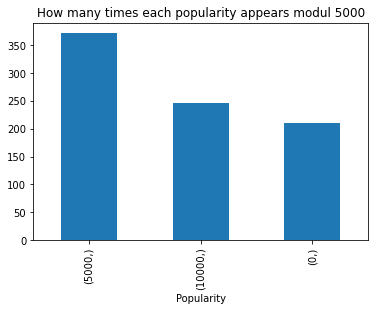

In [100]:
plt.title('How many times each popularity appears modul 5000')
df_popularity = df[['Popularity']].apply(lambda x: (x-(x%5000)))
df_popularity

df_popularity_count = df_popularity.value_counts()
df_popularity_count.plot(kind = 'bar')


<AxesSubplot:title={'center':'Source and the Number of Published Anime'}>

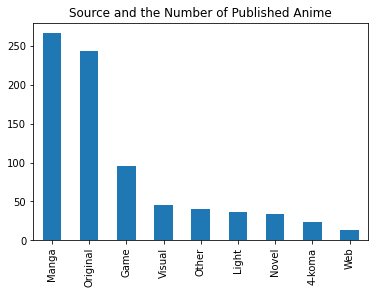

In [101]:
plt.title('Source and the Number of Published Anime')
source_appearances = df['Source Type'].value_counts()
source_appearances[source_appearances>10].plot(kind = 'bar')

In [102]:
df_highpop = df[df['Popularity']>10000]
df_highpop

,Title,MAL Id,Type,Episode Duration,Studios,Source Type,Genres,Themes,Rating,Popularity,Score
18703,Wo Jiao Bai Xiaofei,33357,ONA,11 min. per ep.,['Haoliners Animation League'],Web,"['Action', 'Comedy', 'Horror']",N\A,PG-13 - Teens 13 or older,10627,6.15
30234,Da Yu Hai Tang,39264,ONA,7 min.,['B&T'],Original,"['Adventure', 'Drama', 'Romance', 'Supernatural']",N\A,G - All Ages,11070,6.07
10926,"Umi no Yami, Tsuki no Kage",4484,OVA,30 min. per ep.,['Magic Bus'],Manga,"['Drama', 'Horror', 'Romance']",N\A,R - 17+ (violence & profanity),10197,5.84
41967,Majokko Club Yoningumi: A Kuukan kara no Alien X,2080,OVA,27 min.,['Studio Pierrot'],Original,"['Action', 'Comedy', 'Sci-Fi']",N\A,PG-13 - Teens 13 or older,11149,5.71
36146,Bouken Yuuki Pluster World,3637,TV,24 min. per ep.,"['Actas', ""Brain's Base""]",Original,"['Action', 'Adventure', 'Sci-Fi']",N\A,G - All Ages,11705,6.08
...,...,...,...,...,...,...,...,...,...,...,...
13119,Tales of the Rays Gekijou,36955,ONA,3 min. per ep.,['Bandai Namco Pictures'],Game,"['Comedy', 'Fantasy']",N\A,PG-13 - Teens 13 or older,10628,6.19
11307,Soliton no Akuma,10718,Movie,1 hr. 30 min.,['Triangle Staff'],Novel,"['Drama', 'Sci-Fi']",N\A,R - 17+ (violence & profanity),11656,5.96
37396,Gall Force: The Revolution,2066,OVA,30 min. per ep.,['AIC'],Original,"['Action', 'Adventure', 'Sci-Fi']","['Mecha', 'Military', 'Space']",R+ - Mild Nudity,10173,5.92
4146,Yuukan Club,3778,OVA,35 min. per ep.,['Madhouse'],Manga,"['Comedy', 'Mystery']",N\A,PG-13 - Teens 13 or older,11628,5.82


<AxesSubplot:title={'center':'Source and the Number of Published Anime for High Popularity Anime'}>

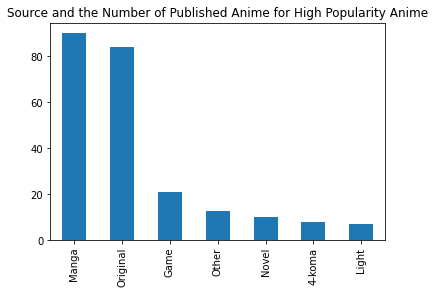

In [103]:
plt.title('Source and the Number of Published Anime for High Popularity Anime')
source_appearances = df_highpop['Source Type'].value_counts()
source_appearances[source_appearances>5].plot(kind = 'bar')

In [104]:
df_lowpop = df[df['Popularity']<2500]
df_lowpop

,Title,MAL Id,Type,Episode Duration,Studios,Source Type,Genres,Themes,Rating,Popularity,Score
40465,Bonjour♪Koiaji Pâtisserie,25839,ONA,5 min. per ep.,"['SILVER LINK.', 'Connect']",Game,"['Comedy', 'Gourmet', 'Romance', 'Slice of Life']",N\A,PG-13 - Teens 13 or older,2477,6.11
9545,Soul Eater NOT!,21507,TV,23 min. per ep.,['Bones'],Manga,"['Action', 'Comedy', 'Supernatural', 'Ecchi']",N\A,PG-13 - Teens 13 or older,994,5.91
5510,Taboo Tattoo,29758,TV,24 min. per ep.,['J.C.Staff'],Manga,"['Action', 'Mystery', 'Supernatural']","['Martial Arts', 'Super Power']",R - 17+ (violence & profanity),742,5.76
15827,Sin: Nanatsu no Taizai,33834,TV,23 min. per ep.,"['Artland', 'TNK']",Other,"['Fantasy', 'Ecchi']",N\A,R+ - Mild Nudity,1345,5.72
18621,Val x Love,39799,TV,23 min. per ep.,['Hoods Entertainment'],Manga,"['Comedy', 'Romance', 'Supernatural', 'Ecchi']","['Harem', 'School']",R - 17+ (violence & profanity),1956,5.90
...,...,...,...,...,...,...,...,...,...,...,...
34999,Maken-Ki! Two,15565,TV,24 min. per ep.,['Xebec'],Manga,"['Action', 'Ecchi']","['Harem', 'Martial Arts', 'School', 'Super Pow...",R+ - Mild Nudity,1331,6.15
26269,BlazBlue: Alter Memory,18767,TV,24 min. per ep.,"['Hoods Entertainment', 'teamKG']",Game,"['Action', 'Fantasy']",N\A,R - 17+ (violence & profanity),1895,6.10
13793,Isuca,25429,TV,23 min. per ep.,['Arms'],Manga,"['Action', 'Comedy', 'Romance', 'Supernatural'...",N\A,R+ - Mild Nudity,1335,6.00
32289,Sword Gai The Animation,27783,ONA,22 min. per ep.,"['Production I.G', 'DLE', 'LandQ studios']",Manga,"['Action', 'Supernatural']",N\A,R - 17+ (violence & profanity),2296,5.77


<AxesSubplot:title={'center':'Source and the Number of Published Anime for Low Popularity Anime'}>

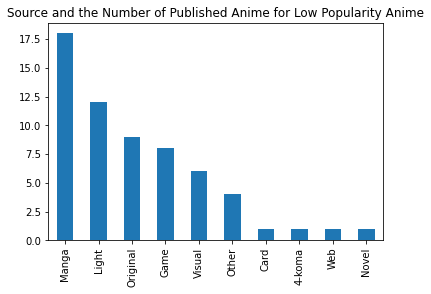

In [105]:
plt.title('Source and the Number of Published Anime for Low Popularity Anime')
source_appearances = df_lowpop['Source Type'].value_counts()
source_appearances.plot(kind = 'bar')

<AxesSubplot:title={'center':'Genres and the Number of Published Anime for High Popularity Anime'}>

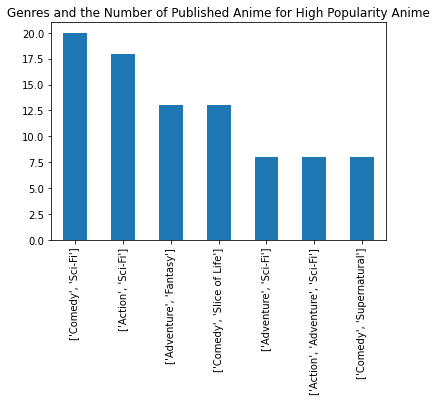

In [106]:
plt.title('Genres and the Number of Published Anime for High Popularity Anime')
genre_appearances = df_highpop.Genres.value_counts()
genre_appearances[genre_appearances > 7.5].plot(kind = 'bar')